## Bandit with Differing Epsilon Fill in the Blanks Exercise
The following code outline copied from git repo
1. Class Bandit
2. Epsilon greedy loop
3. Print results

### Imports

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Constants

In [9]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

### Bandit Class

In [10]:
class BanditArm:
    def __init__(self, m):
        # m: the mean rate
        self.m = m
        self.m_estimate = 0. # Nothing known initially - initialize as None
        self.N = 0. # No trials run yet - initialize as 0

    def pull(self):
        # draw a 1 with probability p
        return np.random.randn() + self.m # This is now a gaussian distributed reward rather than a Bernoulli

    def update(self, x):
        self.N += 1 # An update represents a trial - increment by 1
    #     self.p_estimate = (x/self.N) if self.p_estimate == None else (self.p_estimate + 1/self.N*(x - self.p_estimate))
        self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x

### Experiment

In [6]:
def run_experiment(m1, m2, m3, eps, N):
    bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]
    
    # Count number of suboptimal choices
    means = np.array([m1, m2, m3])
    true_best = np.argmax(means)
    count_optimatl = 0
    count_suboptimatl = 0
    
    data = np.empty(N)
    
    for i in range(N):
        # use epsilon-greedy to select the next bandit
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits)) # Select index of a bandit at random
        else:
            j = np.argmax([b.m_estimate for b in bandits]) # Exploited means pick the optimal bandit as it is so far thought to be
        x = bandits[j].pull()
        bandits[j].update(x)
        
        if j != true_best:
            count_suboptimatl += 1

        # For the plot
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # Plot moving averate ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.m_estimate)
    
    print('Percent suboptimal for epsilon = {}: {}'.format(eps, float(count_suboptimatl)/N))
    
    return cumulative_average

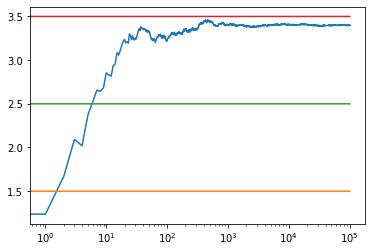

1.5396370630280563
2.4962131460754065
3.4961827044005465
Percent suboptimal for epsilon = 0.1: 0.06589


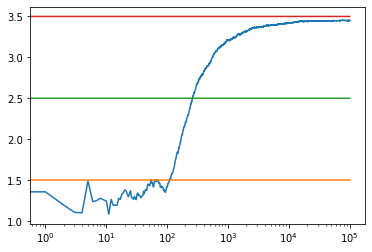

1.5330399880679997
2.503190041184926
3.5012165250167726
Percent suboptimal for epsilon = 0.05: 0.03447


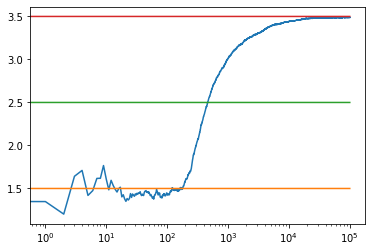

1.463171106851831
2.4546565335077366
3.50383231034189
Percent suboptimal for epsilon = 0.01: 0.00917


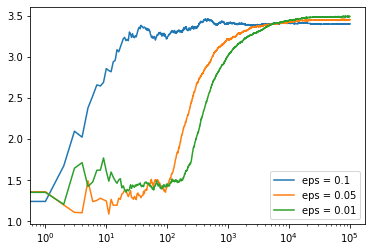

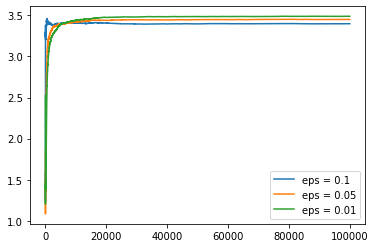

In [7]:
m1, m2, m3 = 1.5, 2.5, 3.5
c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

# linear scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()